## Importação dos dados

In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Importando as bibliotecas do Sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [2]:
# Importando os dados
base_credit = pd.read_csv("credit_risk_dataset.csv")

## Análise Exploratória

In [3]:
# Shape dos dados
base_credit.shape

(32581, 12)

In [4]:
# Visualizando os dados
base_credit.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [5]:
# Visualizando os valores nulos
base_credit.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [6]:
# Visualizando os tipos de dados
base_credit.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [7]:
## Describe dos dados
base_credit.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [8]:
## preenchendo os valores nulos com a media
base_credit['loan_int_rate'] = base_credit['loan_int_rate'].fillna(base_credit['loan_int_rate'].mean())
base_credit['person_emp_length'] = base_credit['person_emp_length'].fillna(base_credit['person_emp_length'].mean())

In [9]:
# Visualizando os valores nulos
base_credit.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [10]:
# Observando valores duplicados
base_credit.duplicated().sum()

165

In [11]:
# Apagando valores duplicados
base_credit.drop_duplicates(inplace=True)

In [12]:
# Observando valores duplicados novamente
base_credit.duplicated().sum()

0

In [13]:
# Confirmando que realmente os valores duplicados foram apagados
base_credit.shape

(32416, 12)

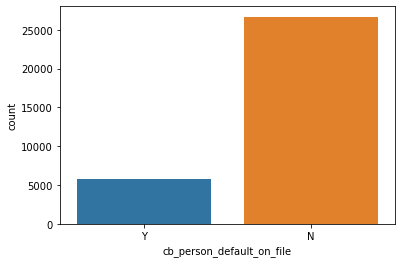

In [14]:
# Visualizando o Padrão histórico dos clientes
# Y = tem um padrão historico e N = não tem um padrão histórico
sns.countplot(x = base_credit['cb_person_default_on_file']);

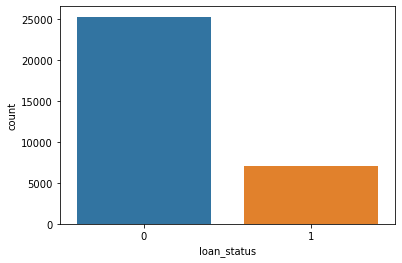

In [15]:
# Visualizando o Status de empréstimo dos clientes
# Onde 0 = não é padrão e 1 = é padrão 
sns.countplot(x = base_credit['loan_status']);

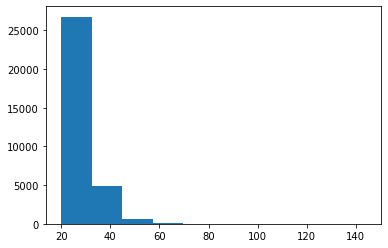

In [16]:
# Idade esta entre os 20 e 30 anos
plt.hist(x = base_credit['person_age'] ); 

## Modelagem de dados

In [17]:
# Visualizando a coluna person_home_ownership
base_credit.person_home_ownership.value_counts()

RENT        16378
MORTGAGE    13369
OWN          2563
OTHER         106
Name: person_home_ownership, dtype: int64

In [18]:
# Fazendo a transformação de objeto para numero inteiro da coluna person_home_ownership
# 0 = MORTGAGE (HIPOTECA)
# 1 = OTHER (OUTRO)
# 2 = OWN (TER)
# 3 = RENT (ALUGUEL)
base_credit['person_home_ownership'] = LabelEncoder().fit_transform(base_credit['person_home_ownership'])
base_credit.person_home_ownership.value_counts()

3    16378
0    13369
2     2563
1      106
Name: person_home_ownership, dtype: int64

In [19]:
# Visualizando a coluna loan_intent
base_credit.loan_intent.value_counts()

EDUCATION            6411
MEDICAL              6042
VENTURE              5682
PERSONAL             5498
DEBTCONSOLIDATION    5189
HOMEIMPROVEMENT      3594
Name: loan_intent, dtype: int64

In [20]:
# Fazendo a transformação de objeto para numero inteiro da coluna loan_intent
# 0 = DEBTCONSOLIDATION (CONSOLIDAÇÃO DE DÉBITO)
# 1 = EDUCATION (EDUCAÇÃO)
# 2 = HOMEIMPROVEMEN (MELHORIA DA CASA)
# 3 = MEDICAL (MÉDICO)
# 4 = PERSONAL (PESSOAL)
# 5 = VENTURE (RISCO)
base_credit['loan_intent'] = LabelEncoder().fit_transform(base_credit['loan_intent'])
base_credit.loan_intent.value_counts()

1    6411
3    6042
5    5682
4    5498
0    5189
2    3594
Name: loan_intent, dtype: int64

In [21]:
# Visualizando a coluna loan_intent
base_credit.loan_grade.value_counts()

A    10703
B    10387
C     6438
D     3620
E      963
F      241
G       64
Name: loan_grade, dtype: int64

In [22]:
# Fazendo a transformação de objeto para numero inteiro da coluna loan_grade
# 0 = A 
# 1 = B
# 2 = C
# 3 = D
# 4 = E
# 5 = F
# 6 = G
base_credit['loan_grade'] = LabelEncoder().fit_transform(base_credit['loan_grade'])
base_credit.loan_grade.value_counts()

0    10703
1    10387
2     6438
3     3620
4      963
5      241
6       64
Name: loan_grade, dtype: int64

In [23]:
# Visualizando a coluna cb_person_default_on_file
base_credit.cb_person_default_on_file.value_counts()

N    26686
Y     5730
Name: cb_person_default_on_file, dtype: int64

In [24]:
# Fazendo a transformação de objeto para numero inteiro da coluna loan_grade
# 0 = N 
# 1 = Y
base_credit['cb_person_default_on_file'] = LabelEncoder().fit_transform(base_credit['cb_person_default_on_file'])
base_credit.cb_person_default_on_file.value_counts()

0    26686
1     5730
Name: cb_person_default_on_file, dtype: int64

In [25]:
# Visualizando os dados
base_credit.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,123.0,4,3,35000,16.02,1,0.59,1,3
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4


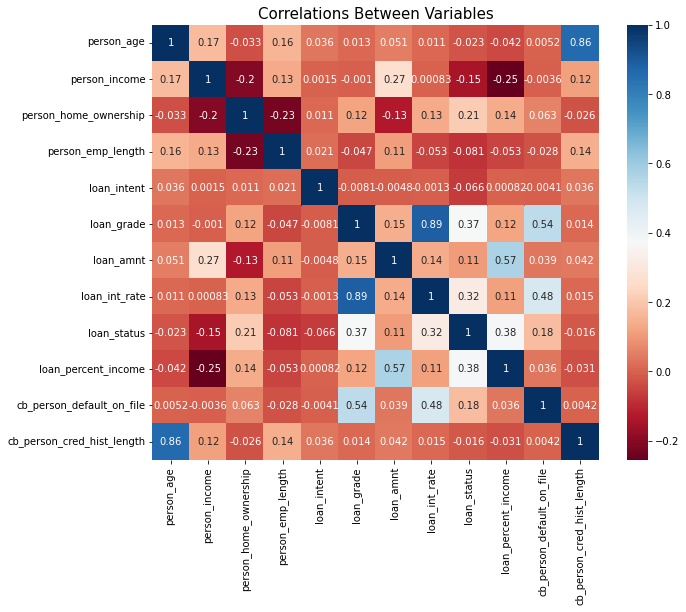

In [26]:
# Visualizando o gráfico de correlação
plt.figure(figsize=(10,8))
sns.heatmap(base_credit.corr(), annot=True, cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

##  Separando o dataset em treino e teste

In [27]:
# Separando os dados de X sem a variavel target
X_credit = base_credit.drop('loan_status', axis=1).values
X_credit

array([[2.2e+01, 5.9e+04, 3.0e+00, ..., 5.9e-01, 1.0e+00, 3.0e+00],
       [2.1e+01, 9.6e+03, 2.0e+00, ..., 1.0e-01, 0.0e+00, 2.0e+00],
       [2.5e+01, 9.6e+03, 0.0e+00, ..., 5.7e-01, 0.0e+00, 3.0e+00],
       ...,
       [6.5e+01, 7.6e+04, 3.0e+00, ..., 4.6e-01, 0.0e+00, 2.8e+01],
       [5.6e+01, 1.5e+05, 0.0e+00, ..., 1.0e-01, 0.0e+00, 2.6e+01],
       [6.6e+01, 4.2e+04, 3.0e+00, ..., 1.5e-01, 0.0e+00, 3.0e+01]])

In [28]:
# Separando a variavel target
y_credit = base_credit['loan_status'].values
y_credit

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [29]:
# Separando o dataset em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X_credit, y_credit, train_size = 0.8, random_state=0)
X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape

((25932, 11), (6484, 11), (25932,), (6484,))

## Padronizando os dados

In [30]:
# Fazendo a padronização dos dados
base_credit_padronizado = StandardScaler()
base_credit_padronizado  = base_credit_padronizado.fit_transform(X_credit)

In [31]:
# Visualizando os dados
base_credit_padronizado

array([[-0.90447055, -0.11435433,  0.92303999, ...,  3.92986465,
         2.15806455, -0.69261376],
       [-1.06185168, -0.91094064,  0.22528185, ..., -0.65770679,
        -0.46337817, -0.93898181],
       [-0.43232717, -0.91094064, -1.17023441, ...,  3.74261683,
        -0.46337817, -0.69261376],
       ...,
       [ 5.862918  ,  0.15977456,  0.92303999, ...,  2.71275386,
        -0.46337817,  5.4665877 ],
       [ 4.44648784,  1.3530415 , -1.17023441, ..., -0.65770679,
        -0.46337817,  4.97385158],
       [ 6.02029913, -0.38848322,  0.92303999, ..., -0.18958726,
        -0.46337817,  5.95932381]])

## Modelo de Machine Learning

In [32]:
# importando o modelo Random Forest
arvore_decisao = RandomForestClassifier()

In [33]:
# Treinando o modelo
arvore_decisao.fit(X_treino, y_treino)

RandomForestClassifier()

In [34]:
# Visualizando a accuracy do modelo de treino
arvore_decisao.score(X_treino, y_treino)

1.0

In [35]:
# Fazendo as previsões e visualizando com o predict
y_pred = arvore_decisao.predict(X_teste)
y_pred

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [36]:
# Comparando com o y_teste
y_teste

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [37]:
# Accuracy do modelo com os dados de teste
accuracy_score(y_teste, y_pred)

0.9341455891425047

## Métricas para descobrir se o modelo está bom

Text(0.5, 1.0, 'Random Forest confusion matrix')

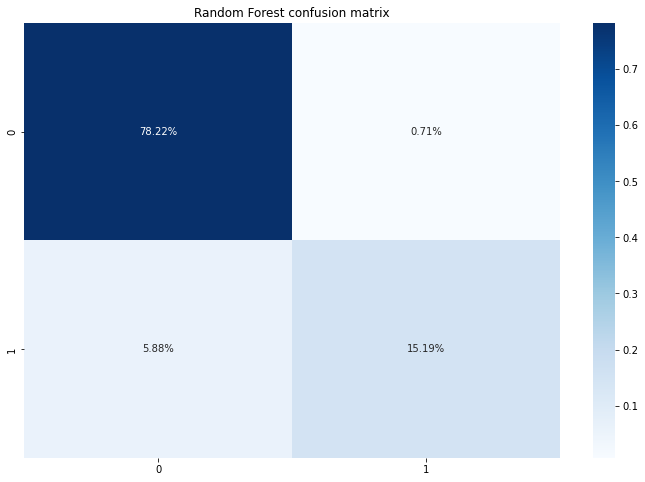

In [38]:
# Confusion Matrix
plt.figure(figsize = (12,8))
cf_matrix = confusion_matrix(y_teste, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
plt.title('Random Forest confusion matrix')

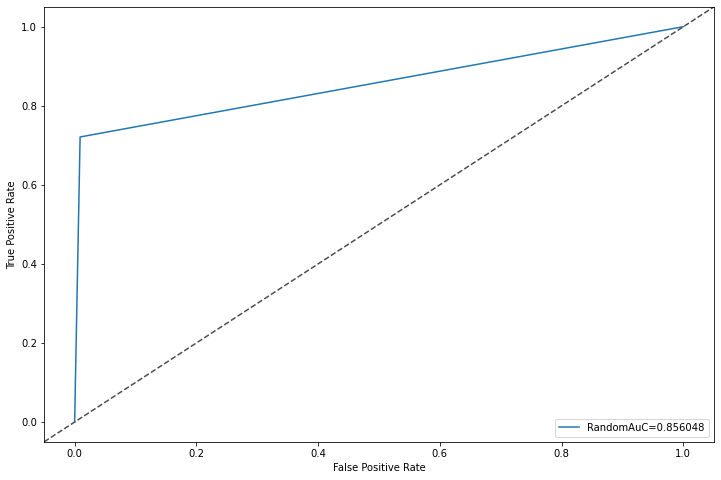

In [39]:
# Curva AUC
fig, ax = plt.subplots(figsize = (12,8))
fpr, tpr, _  = roc_curve(y_teste, y_pred)
auc = round(roc_auc_score(y_teste, y_pred), 6)

plt.plot(fpr,tpr,label="RandomAuC="+str(auc))

plt.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [40]:
# Visualizando outras métricas
print(classification_report(y_teste, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5118
           1       0.96      0.72      0.82      1366

    accuracy                           0.93      6484
   macro avg       0.94      0.86      0.89      6484
weighted avg       0.94      0.93      0.93      6484



## Modelo versão 2 com classe balanceada

In [41]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()

In [42]:
X_credit2, y_credit2 = smt.fit_resample(X_credit, y_credit)

In [43]:
yi = y_credit2.astype(int)
np.bincount(yi)

array([25327, 25327], dtype=int64)

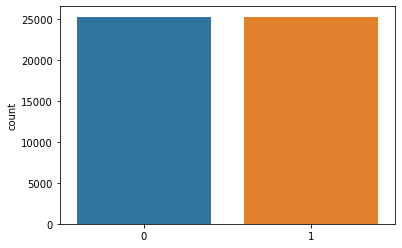

In [44]:
ax = sns.countplot(x=yi)

In [45]:
# Separando o dataset em treino e teste
X_treino2, X_teste2, y_treino2, y_teste2 = train_test_split(X_credit2, y_credit2, train_size = 0.8, random_state=0)
X_treino2.shape, X_teste2.shape, y_treino2.shape, y_teste2.shape

((40523, 11), (10131, 11), (40523,), (10131,))

In [46]:
# Fazendo a padronização dos dados
base_credit_padronizado2 = StandardScaler()
base_credit_padronizado2  = base_credit_padronizado2.fit_transform(X_credit2)

In [47]:
base_credit_padronizado2

array([[-0.93983503, -0.0173438 ,  0.82603383, ...,  3.21716264,
         2.01383783, -0.71251026],
       [-1.10877867, -0.92026904,  0.08444525, ..., -0.80361823,
        -0.57806955, -0.97494905],
       [-0.4330041 , -0.92026904, -1.39873189, ...,  3.05304913,
        -0.57806955, -0.71251026],
       ...,
       [-0.69007943, -0.108733  ,  0.82603383, ..., -0.14716421,
         1.39393553, -0.97494905],
       [ 0.53550302, -0.10694732, -1.39873189, ..., -0.9057166 ,
        -0.57806955,  0.86212247],
       [-0.90013895, -0.76673519,  0.08444525, ...,  0.1810628 ,
        -0.57806955, -0.97494905]])

In [48]:
# importando o modelo Random Forest
arvore_decisao_m2 = RandomForestClassifier()

In [49]:
# Treinando o modelo
arvore_decisao_m2.fit(X_treino2, y_treino2)

RandomForestClassifier()

In [50]:
# Visualizando a accuracy do modelo de treino
arvore_decisao_m2.score(X_treino2, y_treino2)

0.9999506453125385

In [59]:
# Fazendo as previsões e visualizando com o predict
y_pred2 = arvore_decisao_m2.predict(X_teste2)
y_pred2

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [60]:
# Comparando com o y_teste
y_teste2

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [61]:
# Accuracy do modelo com os dados de teste
accuracy_score(y_teste2, y_pred2)

0.9530154969894383

Text(0.5, 1.0, 'Random Forest confusion matrix balanceado')

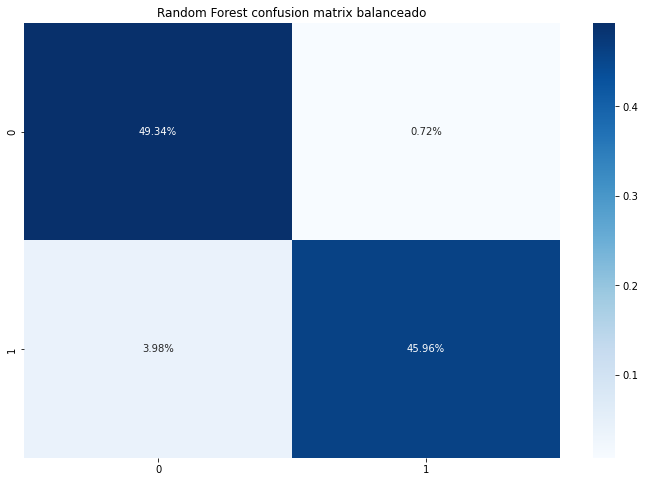

In [62]:
# Confusion Matrix
plt.figure(figsize = (12,8))
cf_matrix = confusion_matrix(y_teste2, y_pred2)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
plt.title('Random Forest confusion matrix balanceado')

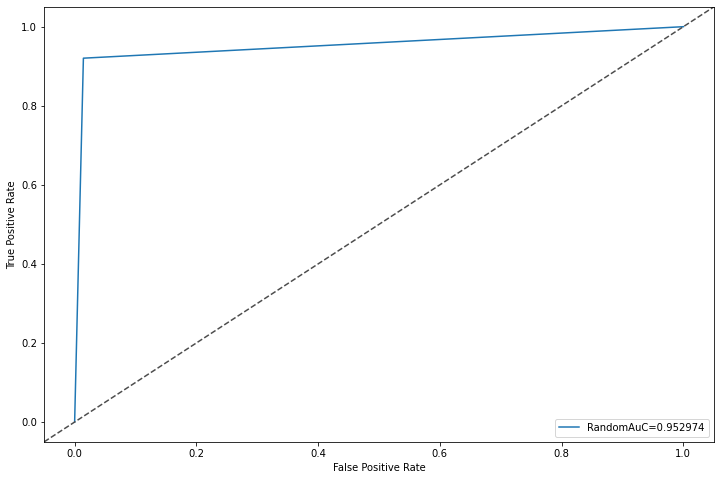

In [63]:
# Curva AUC
fig, ax = plt.subplots(figsize = (12,8))
fpr, tpr, _  = roc_curve(y_teste2, y_pred2)
auc = round(roc_auc_score(y_teste2, y_pred2), 6)

plt.plot(fpr,tpr,label="RandomAuC="+str(auc))

plt.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [64]:
# Visualizando outras métricas
print(classification_report(y_teste2, y_pred2))

              precision    recall  f1-score   support

           0       0.93      0.99      0.95      5072
           1       0.98      0.92      0.95      5059

    accuracy                           0.95     10131
   macro avg       0.95      0.95      0.95     10131
weighted avg       0.95      0.95      0.95     10131

